In [1]:
import numpy as np
from scipy import misc
from scipy import signal

from PIL import Image
import matplotlib.pyplot as plt

In [2]:
import warnings; warnings.filterwarnings('ignore')
import tensorflow as tf

## 1D Example

In [3]:
# one-dimensional conv
X = [1, 2, 5, 4]
W = [6, 2] # kernel or filter

In [4]:
# with zero padding, the final dimension of the array is bigger
y = np.convolve(X, W, mode='full')
print (f'With zero padding \'full\': {y} \n')

# same as zero padding, but with returns an ouput with the same length as max of x or h
y = np.convolve(X, W, mode='same')
print (f'With zero padding \'same\': {y} \n')

# without zero padding
y = np.convolve(X, W, mode='valid')
print (f'Without zero padding: {y} \n')

With zero padding 'full': [ 6 14 34 34  8] 

With zero padding 'same': [ 6 14 34 34] 

Without zero padding: [14 34 34] 



## 2D Example

In [5]:
I = [[255, 7, 3], 
     [212, 240, 4], 
     [218, 216, 230]]

g = [[-1, 1], 
     [2, 3]]

In [6]:
print ('With zero padding \'full\' \n')
print ('{0} \n'.format(signal.convolve( I, g, 'full')))

print ('With zero padding \'same\' \n')
print ('{0} \n'.format(signal.convolve( I, g, 'same')))

print ('Without zero padding \n')
print (signal.convolve( I, g, 'valid'))

With zero padding 'full' 

[[-255  248    4    3]
 [ 298  751  263   13]
 [ 206 1118  714  242]
 [ 436 1086 1108  690]] 

With zero padding 'same' 

[[-255  248    4]
 [ 298  751  263]
 [ 206 1118  714]] 

Without zero padding 

[[ 751  263]
 [1118  714]]


## Tensorflow Example

In [7]:
image = tf.Variable(tf.random_normal([1, 10, 10, 1]))
kernel = tf.Variable(tf.random_normal([3, 3, 1, 1]))

In [8]:
valid_op = tf.nn.conv2d(image, kernel, strides=[1, 1, 1, 1], padding='VALID')
same_op = tf.nn.conv2d(image, kernel, strides=[1, 1, 1, 1], padding='SAME')

In [9]:
init_op = tf.global_variables_initializer()

with tf.Session() as sess:
    
    sess.run(init_op)
    
    print(f'Input with shape: {image.eval().shape} \n')
    # print(f'{image.eval()} \n')
    
    print(f'Filter or Kernel with shape: {kernel.eval().shape} \n')
    # print(f'{kernel.eval()} \n')
    
    result = sess.run(same_op)
    print(f'Result or Feature Map with \'same\' positions with shape: {result.shape} \n')
    # print(f'{result} \n')
    
    result = sess.run(valid_op)
    print(f'Result or Feature Map with \'valid\' positions with shape: {result.shape} \n')
    # print(f'{result} \n')

Input with shape: (1, 10, 10, 1) 

Filter or Kernel with shape: (3, 3, 1, 1) 

Result or Feature Map with 'same' positions with shape: (1, 10, 10, 1) 

Result or Feature Map with 'valid' positions with shape: (1, 8, 8, 1) 



In [10]:
bird_image = Image.open('./images/digit.jpg') # we can experiment with 'digit' and 'bird'
bird_image = bird_image.convert('L') # convert "L" translate color images into black and white

print(f'\n Original type: {bird_image} \n\n')

# convert image to a matrix with values from 0 to 255 (uint8) 
bird_array = np.asarray(bird_image) 
print(f'After conversion to numerical representation: \n\n {bird_array}') 



 Original type: <PIL.Image.Image image mode=L size=181x181 at 0x128123A20> 


After conversion to numerical representation: 

 [[26 14 12 ... 11 11 11]
 [ 0  0  1 ...  0  0  0]
 [12  1  0 ...  0  0  0]
 ...
 [12  0  0 ...  0  0  0]
 [12  0  0 ...  0  0  0]
 [12  0  0 ...  0  0  0]]


Input image converted to gray scale:


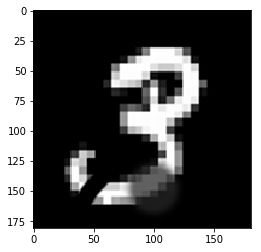

In [11]:
img_plot = plt.imshow(bird_array)
img_plot.set_cmap('gray') # we can experiment different colormaps such as Greys, winter, autumn
print('Input image converted to gray scale:')
plt.show(img_plot)

In [12]:
# edge detector kernel
kernel = np.array([[ 0, 1, 0],
                   [ 1,-4, 1],
                   [ 0, 1, 0],])

In [13]:
feature_map = signal.convolve2d(bird_array, kernel, mode='same', boundary='symm')

GRADIENT MAGNITUDE - Feature map:


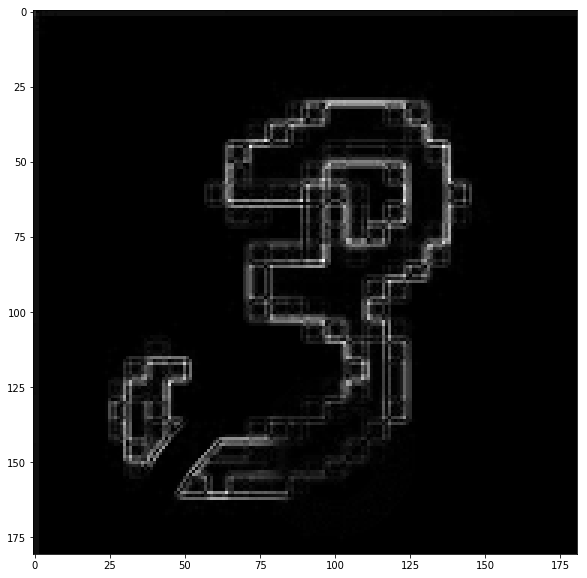

In [14]:
print('GRADIENT MAGNITUDE - Feature map:')
fig, aux = plt.subplots(figsize=(10, 10))
aux.imshow(np.absolute(feature_map), cmap='gray')
plt.show()

GRADIENT MAGNITUDE - Feature map plus bias:


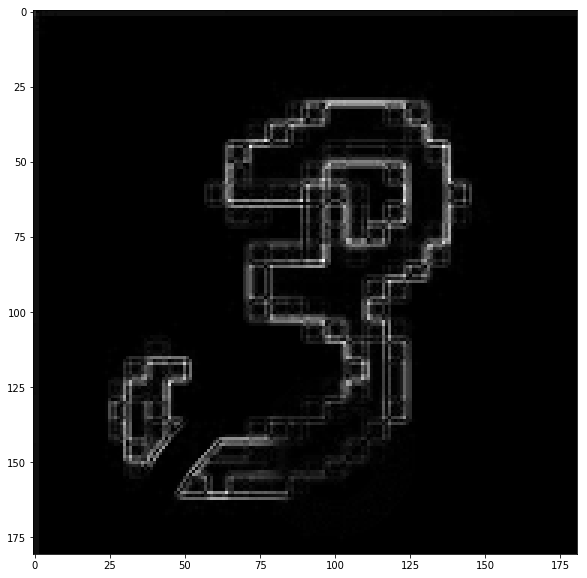

In [15]:
feature_map_plus_bias = np.absolute(feature_map) + 100
print('GRADIENT MAGNITUDE - Feature map plus bias:')
fig, aux = plt.subplots(figsize=(10, 10))
aux.imshow(np.absolute(feature_map_plus_bias), cmap='gray')
plt.show()

GRADIENT MAGNITUDE - Feature map plus bias plus normalization:


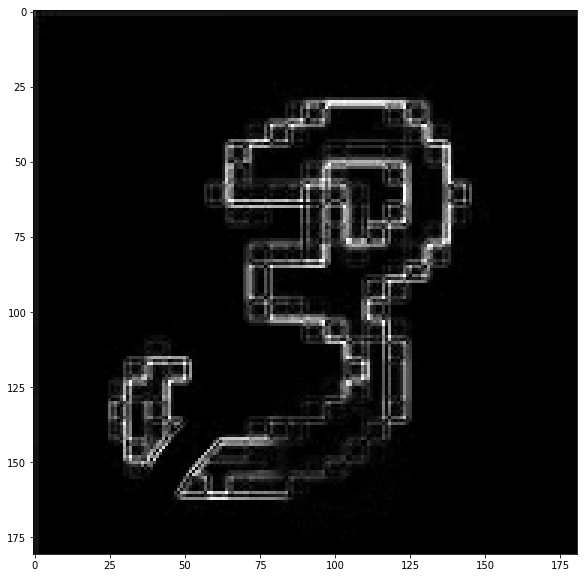

In [16]:
feature_map_plus_bias[feature_map_plus_bias > 255.] = 255.
feature_map_plus_bias_plus_normalization = feature_map_plus_bias
print('GRADIENT MAGNITUDE - Feature map plus bias plus normalization:')
fig, aux = plt.subplots(figsize=(10, 10))
aux.imshow(np.absolute(feature_map_plus_bias_plus_normalization), cmap='gray')
plt.show()

---